Monitoring Air Quality in the Great Smoky Mountains with a Network of Low-cost Sensors
----------------------------------------

**Al Fischer & CHEM 191**  
October, 09 2019-*In Progress*

In [1]:
temp <- list.files(path = "./pre-deployment-outdoor", pattern="*.TXT", full.names = TRUE)
dataFiles <- lapply(temp, read.delim, header = F, col.names = c("ID", "Date/Time", "T (*C)", "RH (%)", "Pressure (hPa)", "VOC (au)", "PM_2.5 (ug/m3)"), check.names = F)
head(dataFiles[[1]])

ERROR: Error in dataFiles[[1]]: subscript out of bounds


In [107]:
require(zoo)

smoothPM <- function(df) {
    df$`PM_2.5_smoothed (ug/m3)` = rollmean(df[, 7], k = 10, na.pad = TRUE, align = "center")
    return(df)
}
dataFiles <- lapply(dataFiles, smoothPM)

normalizeVOC <- function(df) {
    df$`VOC (au)`[1:5] <- NA
    df$`VOC (normalized)` <- (df$`VOC (au)` - min(na.omit(df$`VOC (au)`)))
    df$`VOC (normalized)` <- df$`VOC (normalized)` / max(na.omit(df$`VOC (normalized)`))
    return(df)
}
dataFiles <- lapply(dataFiles, normalizeVOC)

In [108]:
require(dplyr)
options(warn=-1)
dataset = bind_rows(dataFiles)
options(warn=0)
dataset$`Date/Time` <- as.POSIXct(dataset$`Date/Time`)
head(dataset)

ID,Date/Time,T (*C),RH (%),Pressure (hPa),VOC (au),PM_2.5 (ug/m3),PM_2.5_smoothed (ug/m3),VOC (normalized)
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APBW,2019-10-11 12:28:12,21.27,48.92,942.97,NA,8.4,NA,NA
APBW,2019-10-11 12:38:40,21.23,49.60,942.97,NA,17.0,NA,NA
APBW,2019-10-11 12:49:08,21.17,50.03,942.99,NA,4.6,NA,NA
APBW,2019-10-11 12:59:36,21.11,49.17,942.89,NA,25.6,NA,NA
APBW,2019-10-11 13:10:04,21.02,50.25,942.87,NA,48.8,25.42,NA
APBW,2019-10-11 13:20:32,20.87,51.43,942.83,80.91,20.0,25.88,0.09254397


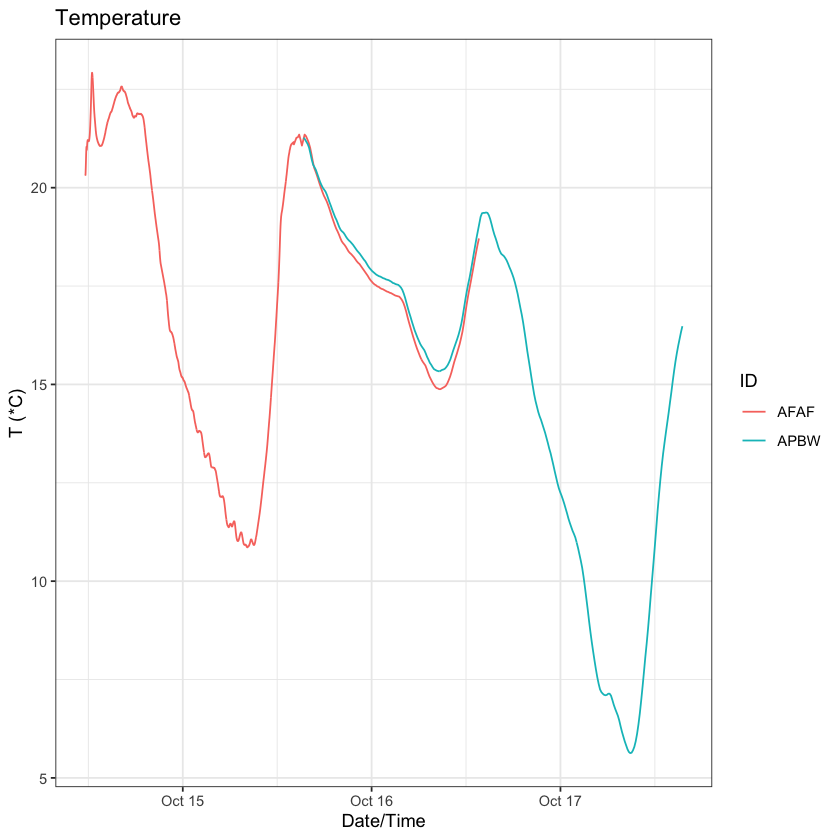

In [109]:
dataset$`Date/Time`[which(dataset$ID == "APBW")] <- dataset$`Date/Time`[which(dataset$ID == "APBW")] + 4.12*24*60*60

require(ggplot2)
ggplot(data = filter(dataset, ID == "AFAF" | ID == "APBW"), aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `T (*C)`)) +
    theme_bw() + labs(title = "Temperature")

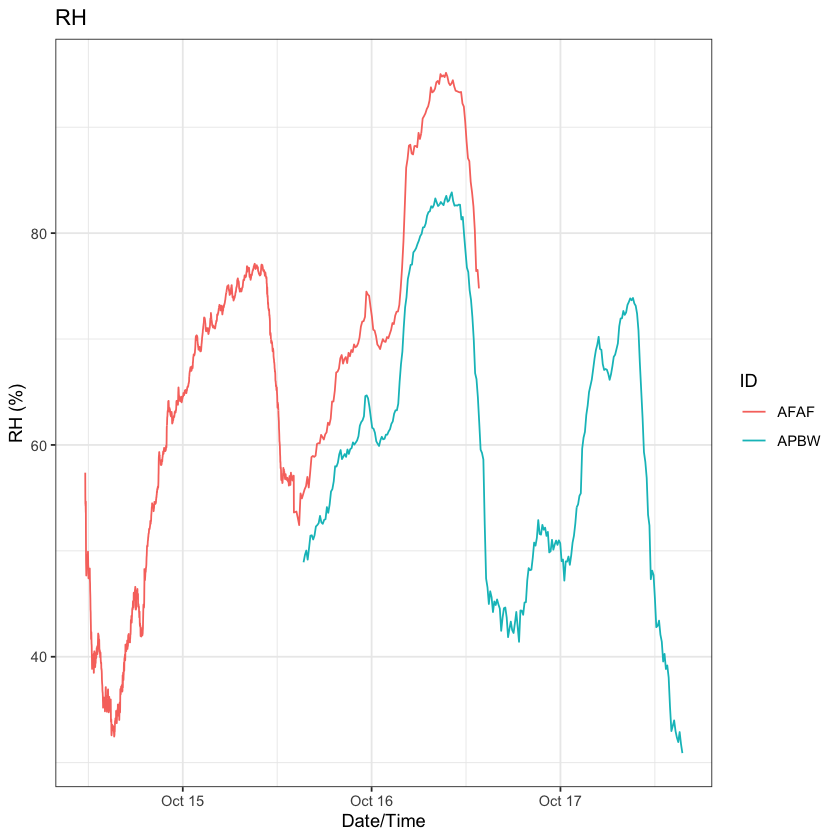

In [111]:
ggplot(data = filter(dataset, ID == "AFAF" | ID == "APBW"), aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `RH (%)`)) +
    theme_bw() + labs(title = "RH")

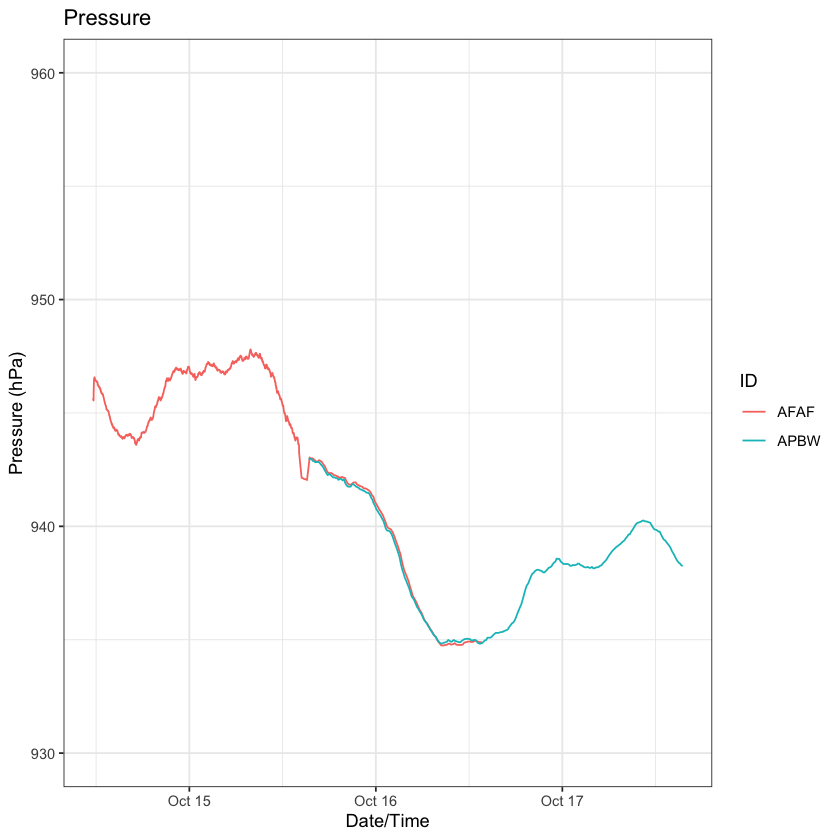

In [112]:
ggplot(data = filter(dataset, ID == "AFAF" | ID == "APBW"), aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `Pressure (hPa)`)) + ylim(930, 960) +
    theme_bw() + labs(title = "Pressure")

Warning message:
“Removed 10 rows containing missing values (geom_path).”

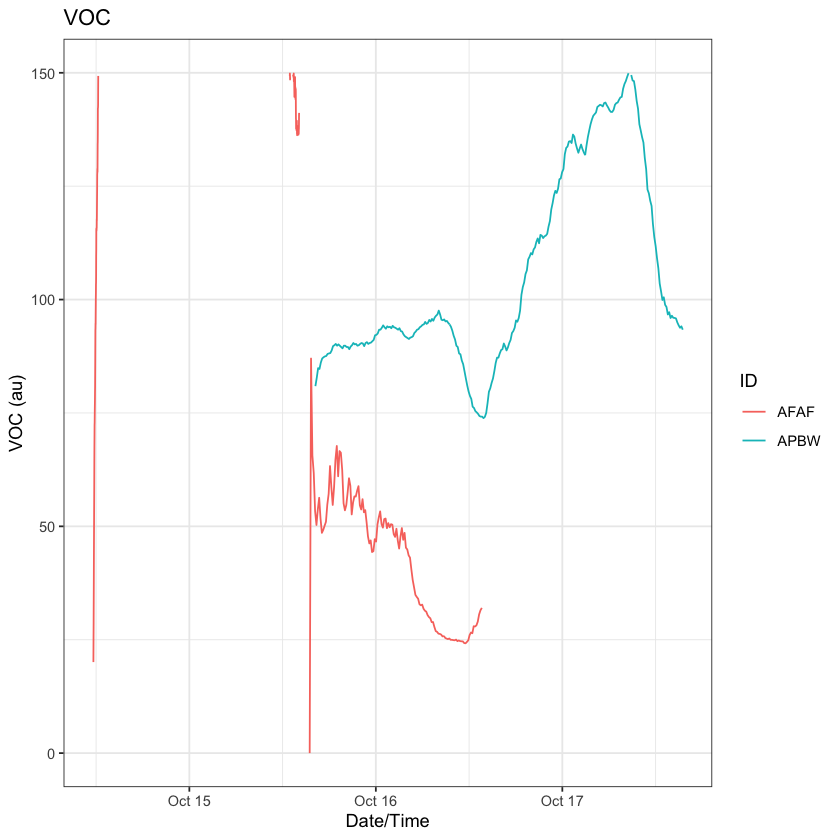

In [113]:
ggplot(data = filter(dataset, ID == "AFAF" | ID == "APBW"), aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `VOC (au)`)) + ylim(0, 150) +
    theme_bw() + labs(title = "VOC")

Warning message:
“Removed 10 rows containing missing values (geom_path).”

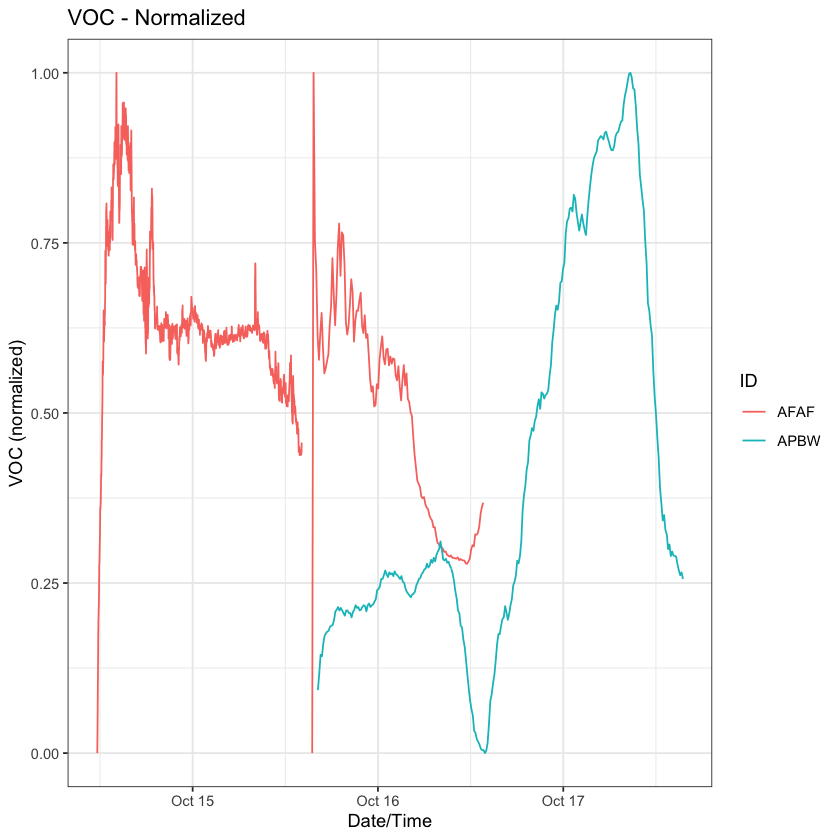

In [114]:
ggplot(data = filter(dataset, ID == "AFAF" | ID == "APBW"), aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `VOC (normalized)`)) + ylim(0, 1) +
    theme_bw() + labs(title = "VOC - Normalized")

Warning message:
“Removed 18 rows containing missing values (geom_path).”

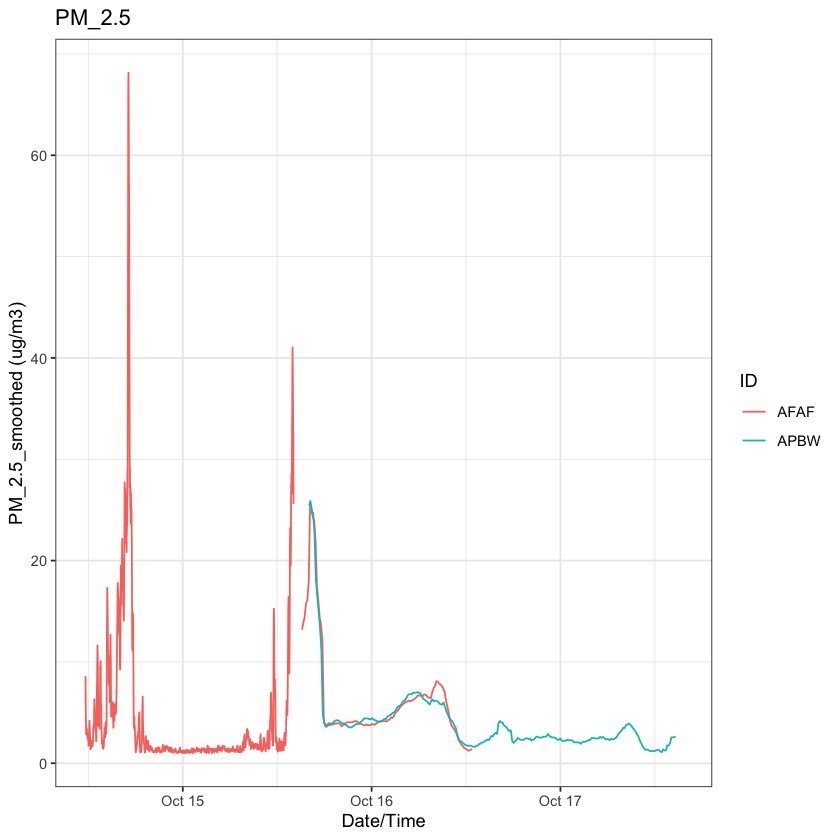

In [115]:
ggplot(data = filter(dataset, ID == "AFAF" | ID == "APBW"), aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `PM_2.5_smoothed (ug/m3)`)) + 
    theme_bw() + labs(title = "PM_2.5")